## Implement the Naive Bayes classifier: Start by implementing the Naive Bayes classifier using a library such as scikit-learn. This will serve as the baseline classifier for comparison.

In [35]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Plotting the results
import matplotlib.pyplot as plt

In [36]:
# Load the Iris dataset (example dataset)
data = load_digits()
X = data.data
y = data.target

# Generate outliers
num_outliers = 100
outliers = np.random.rand(num_outliers, X.shape[1]) * 10

# Add outliers to the dataset
X_with_outliers = np.vstack((X, outliers))
y_with_outliers = np.hstack((y, np.zeros(num_outliers)))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7578947368421053


## Robust Kernel Density Estimation (RKDE) with Iterative Reweighted Least Squares (IRLS) and M-robust estimation using the Huber function:

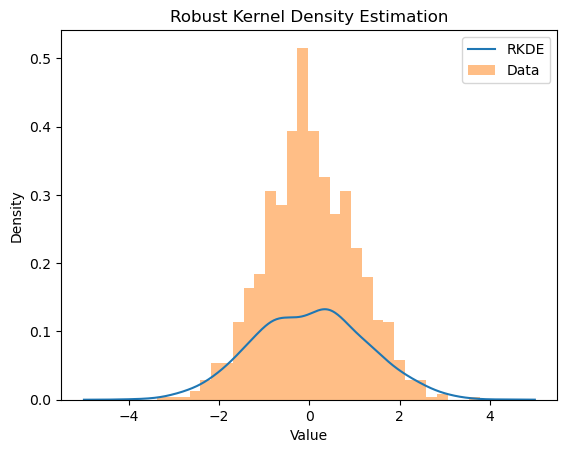

In [37]:
from scipy.stats import norm

def huber(x, c):
    return np.where(np.abs(x) <= c, 0.5 * x**2, c * (np.abs(x) - 0.5 * c))

def rkde(data, x, bandwidth, c):
    n = len(data)
    kde_values = np.zeros_like(x)
    for i in range(n):
        diff = (x - data[i]) / bandwidth
        weights = huber(diff, c)
        kde_values += weights * norm.pdf(diff)
    kde_values /= (n * bandwidth)
    return kde_values

# Example usage
data = np.random.normal(0, 1, 1000)  # Example dataset
x = np.linspace(-5, 5, 500)  # Range of values to estimate density
bandwidth = 0.5  # Bandwidth parameter
#c = 1.345  # Huber function parameter
c = 1.1
# Calculate RKDE
rkde_values = rkde(data, x, bandwidth, c)

plt.plot(x, rkde_values, label='RKDE')
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Robust Kernel Density Estimation')
plt.show()


## Implement your own PSO algorithm to perform bandwidth selection in RKDE. Define the fitness functions using least-square Unbiased Cross-Validation (UCV) and Biased Cross-Validation (BCV) methods.

In [38]:
def ucv_objective(bandwidth, data,c=c):
    n = len(data)
    kde_values = rkde(data, data, bandwidth, c=c)
    error = np.sum((1 / (n * bandwidth)) - kde_values)**2
    return error

def bcv_objective(bandwidth, data,c = c):
    n = len(data)
    h = 1.06 * np.std(data) * (n**(-1/5))  # Silverman's rule of thumb
    kde_values = rkde(data, data, bandwidth, c=c)
    error = np.sum((1 / (n * h)) - kde_values)**2
    return error

def pso_bandwidth_selection(data, objective,inertia=.8,cognitive_weight=2.8):
    num_particles = 10
    num_iterations = 10
    bandwidth_min = 0.1
    bandwidth_max = 0.9

    def fitness(position):
        return objective(position, data)

    best_global_position = None
    best_global_fitness = float('inf')

    swarm = np.random.uniform(bandwidth_min, bandwidth_max, (num_particles, 1))
    velocities = np.zeros_like(swarm)

    for iter in range(num_iterations):
        print(iter)
        for i in range(num_particles):
            fitness_i = fitness(swarm[i])
            if fitness_i < best_global_fitness:
                best_global_position = swarm[i].copy()
                best_global_fitness = fitness_i

            # Update velocity
            velocities[i] = inertia * velocities[i] + cognitive_weight * np.random.rand() * (best_global_position - swarm[i])

            # Update position
            swarm[i] += velocities[i]
            swarm[i] = np.clip(swarm[i], bandwidth_min, bandwidth_max)

    return best_global_position[0]

# Bandwidth selection using PSO with UCV objective
optimal_bandwidth_ucv = pso_bandwidth_selection(data, ucv_objective)
print("Bandwidth selection using PSO with UCV objective: {}".format(optimal_bandwidth_ucv))
# Bandwidth selection using PSO with BCV objective
optimal_bandwidth_bcv = pso_bandwidth_selection(data, bcv_objective)
print("Bandwidth selection using PSO with BCV objective: {}".format(optimal_bandwidth_bcv))

# Calculate RKDE with optimal bandwidths
rkde_ucv_values = rkde(data, x, optimal_bandwidth_ucv, c=1.345)
rkde_bcv_values = rkde(data, x, optimal_bandwidth_bcv, c=1.345)



0
1
2
3
4
5
6
7
8
9
Bandwidth selection using PSO with UCV objective: 0.9
0
1
2
3
4
5
6
7
8
9
Bandwidth selection using PSO with BCV objective: 0.9


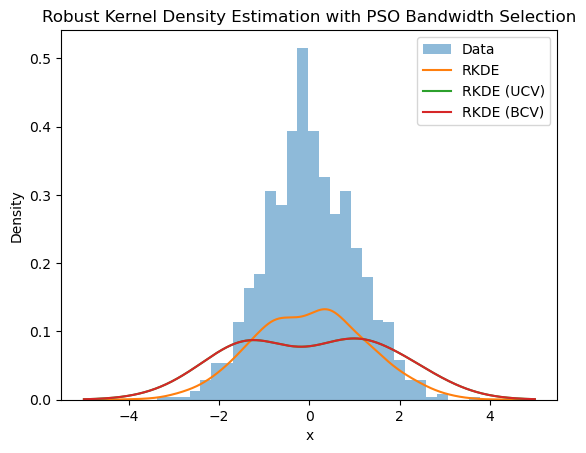

In [39]:
# Plotting the results
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, rkde_values, label='RKDE')
plt.plot(x, rkde_ucv_values, label='RKDE (UCV)')
plt.plot(x, rkde_bcv_values, label='RKDE (BCV)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Robust Kernel Density Estimation with PSO Bandwidth Selection')
plt.show()

## Step 4 : 

In [51]:
# Step 4: Obtain the optimal bandwidth using PSO
optimal_bandwidth_ucv = pso_bandwidth_selection(X_train, ucv_objective)
print("Bandwidth selection using PSO with UCV objective: {}".format(optimal_bandwidth_ucv))

optimal_bandwidth_bcv = pso_bandwidth_selection(X_train, bcv_objective)
print("Bandwidth selection using PSO with BCV objective: {}".format(optimal_bandwidth_bcv))


0


KeyboardInterrupt: 

In [ ]:
#x = np.linspace(-5, 5, 500)  # Range of values to estimate density
rkde_values_train = [rkde(Xi, np.linspace(min(Xi),max(Xi)),bandwidth=optimal_bandwidth_ucv,c = c) for Xi in X_train]
#rkde_values_train = rkde(X_train, optimal_bandwidth)
rkde_values_test = [rkde(Xi, np.linspace(min(Xi),max(Xi)),bandwidth=optimal_bandwidth_ucv,c = c) for Xi in X_test]


In [ ]:

# Step 6: Combine Naive Bayes with RKDE
gnb = GaussianNB()

# Fit the model using RKDE values as additional features
X_train_combined = np.hstack((X_train, rkde_values_train))
X_test_combined = np.hstack((X_test, rkde_values_test))

gnb.fit(X_train_combined, y_train)

# Step 7: Evaluate the model
accuracy = gnb.score(X_test_combined, y_test)
print("Accuracy UCV:", accuracy)

Accuracy: 0.7684210526315789


In [ ]:
#x = np.linspace(-5, 5, 500)  # Range of values to estimate density
rkde_values_train = [rkde(Xi, np.linspace(min(Xi),max(Xi)),bandwidth=optimal_bandwidth_bcv,c = c) for Xi in X_train]
#rkde_values_train = rkde(X_train, optimal_bandwidth)
rkde_values_test = [rkde(Xi, np.linspace(min(Xi),max(Xi)),bandwidth=optimal_bandwidth_bcv,c = c) for Xi in X_test]
# Step 6: Combine Naive Bayes with RKDE
gnb = GaussianNB()

# Fit the model using RKDE values as additional features
X_train_combined = np.hstack((X_train, rkde_values_train))
X_test_combined = np.hstack((X_test, rkde_values_test))

gnb.fit(X_train_combined, y_train)

# Step 7: Evaluate the model
accuracy = gnb.score(X_test_combined, y_test)
print("Accuracy BCV:", accuracy)
